In [1]:

# @hidden_cell
# This function is used to setup the access of Spark to your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
setHadoopConfigWithCredentials_d3bd5b94a9334de59a55a7fed2bedeaa <- function(name) {
    # This function sets the Hadoop configuration so it is possible to
    # access data from Bluemix Object Storage using Spark

    prefix = paste("fs.swift.service" , name, sep =".")
    hConf = SparkR:::callJMethod(sc, "hadoopConfiguration")
    SparkR:::callJMethod(hConf, "set", paste(prefix, "auth.url", sep='.'), paste("https://identity.open.softlayer.com","/v3/auth/tokens",sep=""))
    SparkR:::callJMethod(hConf, "set", paste(prefix, "auth.endpoint.prefix", sep='.'), "endpoints")
    SparkR:::callJMethod(hConf, "set", paste(prefix, "tenant", sep='.'), "6aaf54352357483486ee2d4981f8ef15")
    SparkR:::callJMethod(hConf, "set", paste(prefix, "username", sep='.'), "c0eebedc019f4413be3f3d656821b35f")
    SparkR:::callJMethod(hConf, "set", paste(prefix, "password", sep='.'), "ji[T[l.(7D&gld*5")
    SparkR:::callJMethod(hConf, "set", paste(prefix, "region", sep='.'), "dallas")
    invisible(SparkR:::callJMethod(hConf, "setBoolean", paste(prefix, "public", sep='.'), FALSE))
}

name <- "keystone"
setHadoopConfigWithCredentials_d3bd5b94a9334de59a55a7fed2bedeaa(name)

invisible(sparkR.session(appName = "test SparkSession R"))




In [2]:
df.data.1 <- read.json(paste("swift://", "coursera", "." , name,"/", "bearing1_1_acc_transformed_youtube.json", sep=""), 
                       source = "org.apache.spark.sql.execution.datasources.csv.CSVFileFormat", header = "true")
head(df.data.1)

cluster,hacc,ts,vacc
121149,-0.018,65509065660,-0.077
121149,0.623,65509065700,-0.189
121149,0.774,65509065740,-0.424
121149,0.441,65509065780,0.749
121149,0.419,65509065820,0.080
121149,0.095,65509065860,-0.183


In [3]:
n = nrow(df.data.1)
n

[1] 7175680

In [4]:
createOrReplaceTempView(df.data.1,"data")
df_sample = sql("select * from data where rand() <= .1 order by ts asc")

In [5]:
n = nrow(df_sample)
n

[1] 716937

In [6]:
df_sample_rdf = collect(df_sample)

In [7]:
colnames(df_sample_rdf)

[1] "cluster" "hacc"    "ts"      "vacc"

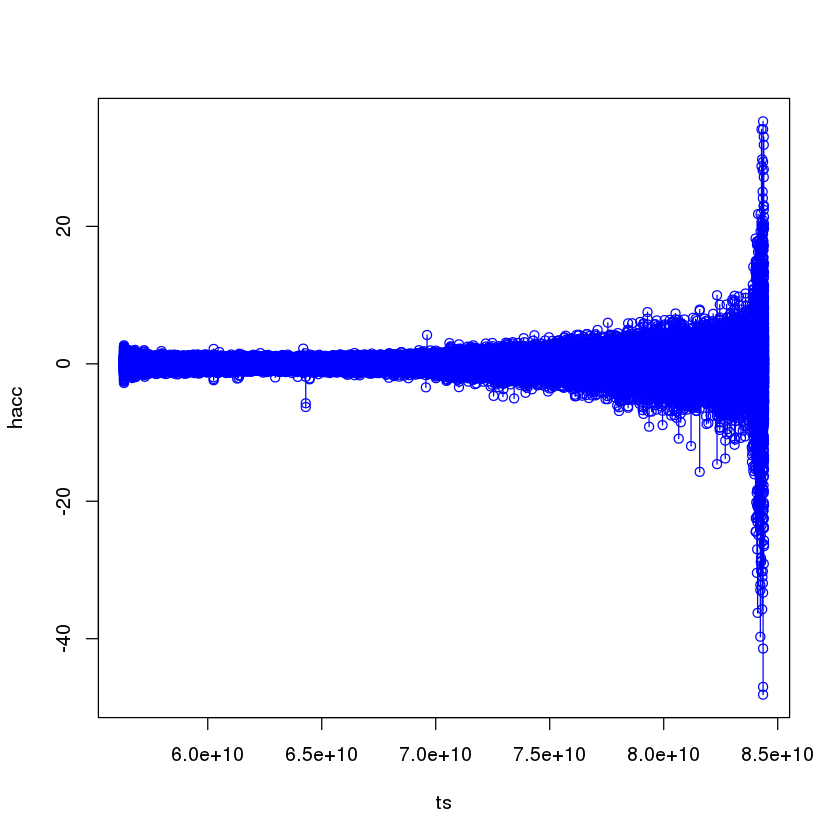

In [8]:
attach(df_sample_rdf)
plot(ts,hacc, type="o", col="blue")
detach(df_sample_rdf)

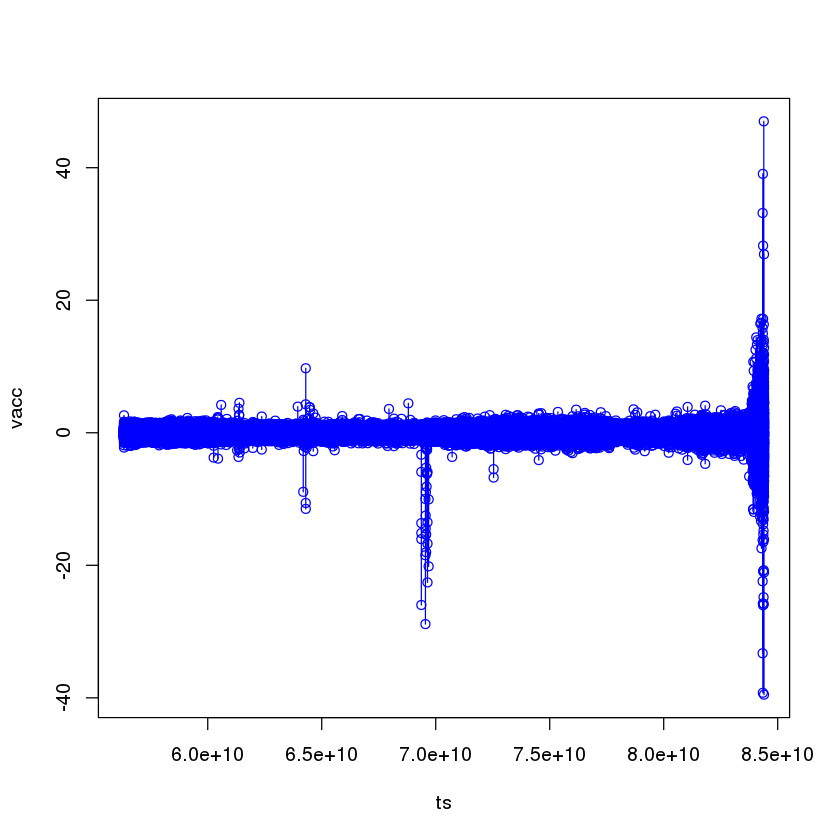

In [9]:
attach(df_sample_rdf)
plot(ts,vacc, type="o", col="blue")
detach(df_sample_rdf)

In [10]:
df_grouped = sql("
    select cluster,
    mean(hacc) as mhacc,
    mean(vacc) as mvacc,
    STDDEV_POP(hacc) as sdhacc,
    STDDEV_POP(vacc) as sdvacc 
    from data 
    group by cluster 
    order by cluster asc")

In [11]:
df_grouped_local = collect(df_grouped)

In [12]:
df_grouped_local

cluster,mhacc,mvacc,sdhacc,sdvacc
10019,0.0022476562,-3.925781e-04,0.3627197,0.4302456
10029,-0.0022738281,1.554687e-03,0.3682204,0.4326750
10039,0.0008089844,-1.763281e-03,0.3931577,0.4370482
10049,0.0054156250,-5.079297e-03,0.3498997,0.4270153
10059,0.0041875000,-1.233203e-03,0.3714736,0.4273195
1009,-0.0025394531,9.703125e-04,0.3715793,0.4294702
101019,0.0046421875,-1.289063e-03,0.3608793,0.4670141
101029,0.0023406250,-3.859375e-03,0.3685824,0.4518146
101039,-0.0055210938,-2.347266e-03,0.3887017,0.4499805
101049,0.0051218750,-5.710937e-04,0.3826731,0.4472926


In [13]:
nrow(df_grouped_local)

[1] 2618

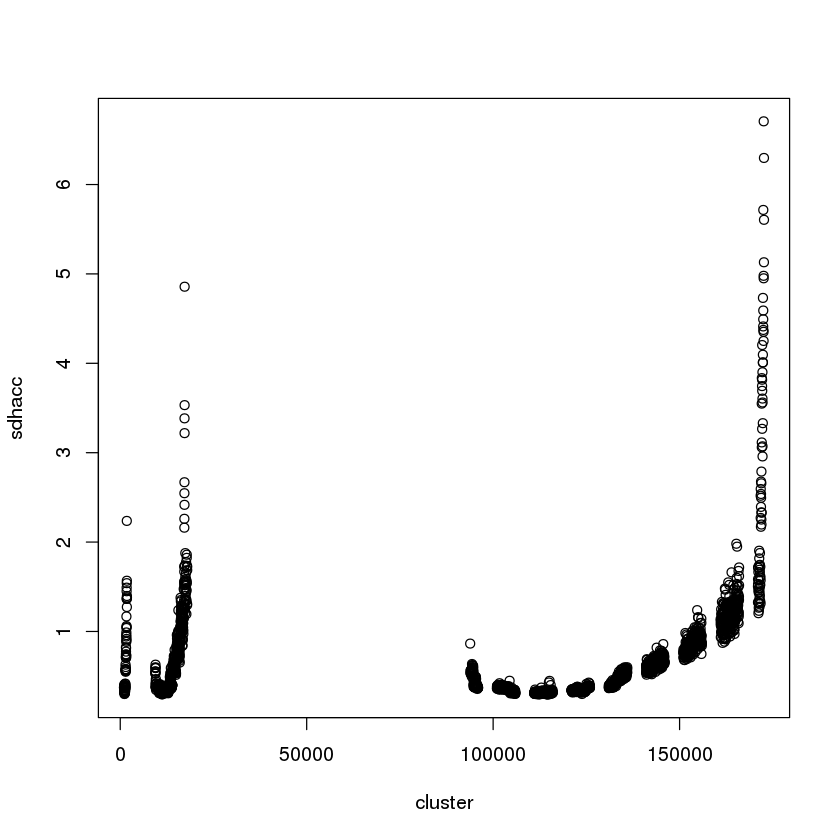

In [14]:
attach(df_grouped_local)
plot(cluster,sdhacc)
detach(df_grouped_local)

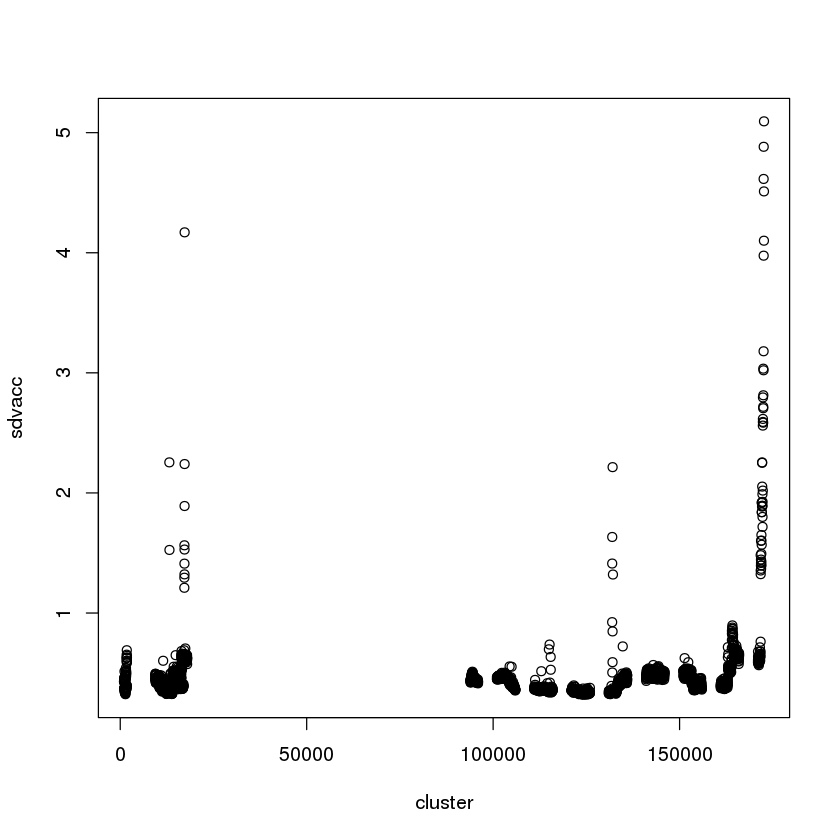

In [15]:
attach(df_grouped_local)
plot(cluster,sdvacc)
detach(df_grouped_local)

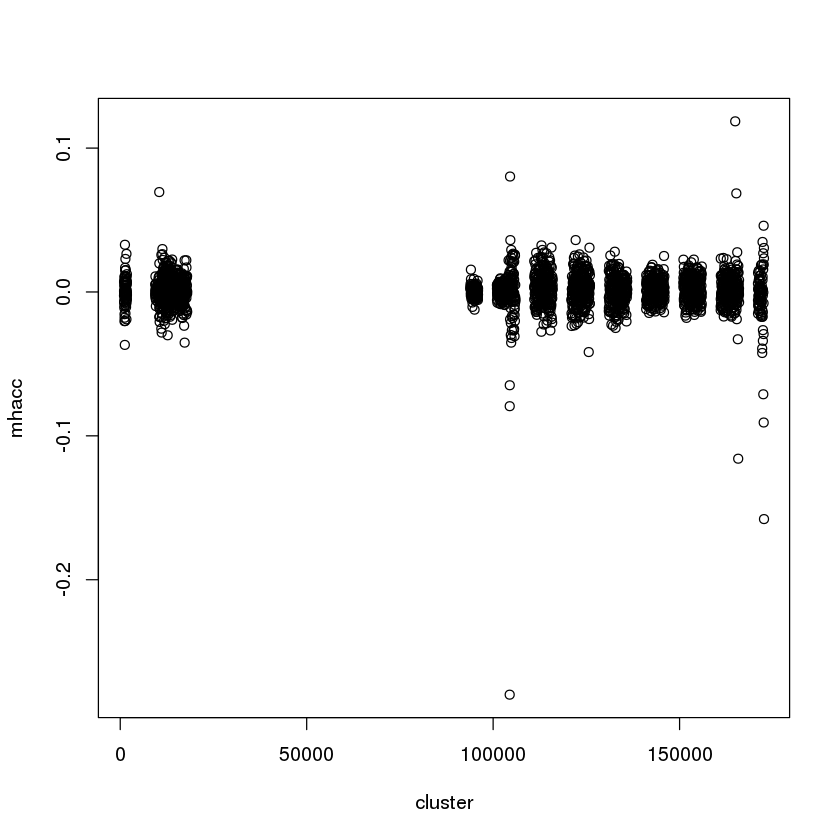

In [16]:
attach(df_grouped_local)
plot(cluster,mhacc)
detach(df_grouped_local)

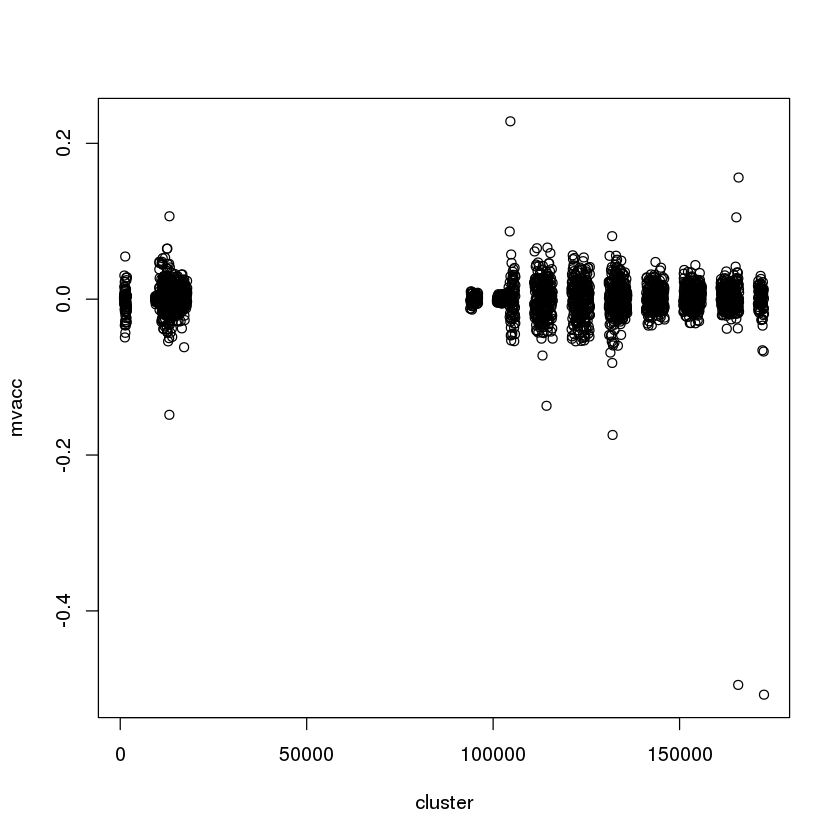

In [17]:
attach(df_grouped_local)
plot(cluster,mvacc)
detach(df_grouped_local)

In [18]:
install.packages("wavelets")

Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/s4c2-1e12ab68a45670-980ba6aaa6c3/R/libs’
(as ‘lib’ is unspecified)


In [19]:
library(wavelets)

In [20]:
attach(df_sample_rdf)
wt = dwt(vacc, filter="haar", boundary="periodic")
detach(df_sample_rdf)

In [21]:
head(unlist(c(wt@W,wt@V[[wt@level]])))

W11         W12         W13         W14         W15         W16 
 0.18950462 -0.29839906  0.00212132 -0.20859650  0.01272792  0.31819805